RECOMMENDER SYSTEM
---
---


1. POPULARITY BASED RECOMMENDER TARGETED AT NEW USERS
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# % matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD



In [14]:
# loding the dataset

amazon_rating = pd.read_csv('/content/sample_data/ratings_Beauty.csv')
amazon_rating = amazon_rating.dropna()
amazon_rating.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [15]:
amazon_rating.shape


(2023070, 4)

In [16]:
popular_products= pd.DataFrame(amazon_rating.groupby('ProductId')['Rating'].count())
most_popular= popular_products.sort_values('Rating', ascending=False)


In [17]:
most_popular.head()


,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088


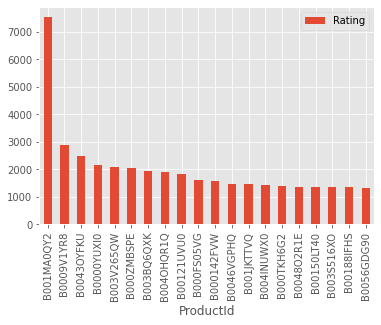

In [20]:
most_popular.head(20).plot(kind='bar')

MODEL BASED RECOMMENDER SYSTEM
---
(collaborative)


In [36]:
amazon_ratings1= amazon_rating.head(10000)


In [37]:
ratings_utility_matrix= amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()


ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
ratings_utility_matrix.shape


(9697, 886)

In [39]:
X= ratings_utility_matrix.T
X.head()



UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
X.shape

(886, 9697)

In [41]:
X1= X.copy()


In [42]:
#DECOMPOSING THE MATRIX
SVD= TruncatedSVD(n_components=10)
decomposed_matrix= SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [45]:
# decomposed_matrix


array([[ 2.50923696e-15,  1.32699442e-14, -7.14129755e-14, ...,
         4.37868433e-13, -2.65978703e-12,  6.84523209e-12],
       [-4.07555853e-14,  5.40024378e-13,  6.36270816e-13, ...,
        -4.79005380e-12,  1.19988167e-11,  6.24521756e-11],
       [-2.66675799e-16, -1.60017421e-15,  5.29184880e-15, ...,
        -4.12137111e-14,  5.39842870e-14, -8.34490282e-14],
       ...,
       [ 2.97329572e-06,  2.27953174e-01, -1.04080434e-02, ...,
        -3.82882060e-03, -9.43645109e-06, -4.92551849e-02],
       [ 8.66407463e-06,  8.35056885e-04,  3.54011851e-05, ...,
         1.38113416e-03,  1.06024533e-04, -9.82972117e-03],
       [ 1.64538750e-04,  4.12586749e-01,  3.54732623e-01, ...,
        -5.56936723e-03, -3.50135228e-02,  5.05745968e-02]])

In [44]:
#CORRELATION MATRIX
correlation_matrix=np.corrcoef(decomposed_matrix)
correlation_matrix.shape


(886, 886)

In [46]:
# correlation_matrix

array([[ 1.        ,  0.83725815, -0.75934848, ..., -0.24322169,
        -0.87752931, -0.165208  ],
       [ 0.83725815,  1.        , -0.45673571, ..., -0.28879765,
        -0.94478046, -0.30922879],
       [-0.75934848, -0.45673571,  1.        , ...,  0.23192258,
         0.3975307 , -0.31844085],
       ...,
       [-0.24322169, -0.28879765,  0.23192258, ...,  1.        ,
         0.30320502,  0.17737122],
       [-0.87752931, -0.94478046,  0.3975307 , ...,  0.30320502,
         1.        ,  0.44011925],
       [-0.165208  , -0.30922879, -0.31844085, ...,  0.17737122,
         0.44011925,  1.        ]])

In [57]:
X.index[217]

'9788073239'

In [58]:
i= X.index[217]
i

'9788073239'

In [59]:
product_names= list(X.index)
product_ID = product_names.index(i)
product_ID

217

In [60]:
correlation_product_ID= correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [61]:
Recommend= list(X.index[correlation_product_ID>0.90])
print(len(Recommend))
Recommend.remove(i) #removes the item already bought by the user
Recommend[0:9]


250


['0762451459',
 '1304139220',
 '130414089X',
 '130414674X',
 '1304174778',
 '1304196046',
 '1304196062',
 '1304196070',
 '1304196135']

RECOMMENDER PART 3 
---


In [83]:
#inmporting libratiers
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [84]:
product_description = pd.read_csv('/content/sample_data/product_descriptions.csv')
# product_description.shape
# product_description.head()

In [85]:
vectorizer =TfidfVectorizer(stop_words='english')
X1=vectorizer.fit_transform(product_description)


In [88]:
X= X1.copy()
y_kmeans=KMeans.fit_predict(X)
plt.plot(y_kmeans, ",")
plt.show()



TypeError: ignored

In [ ]:
product_description['Cluster']= y_kmeans

In [73]:
def print_cluster(i):
  print("Cluster %d:"%i),
  for ind in order_centroids[1, :10]:
    print('%s' %terms[ind])
  return i
  

In [ ]:
from numpy.ma.core import argsort
## OPTIMAL CLUSTERS IS
true_k = 10
model= KMeans (n_clusters=true_k, init='k-means++', max_iter=100, n)
model.fit(X1)

print("top terms per cluster:")
order_centroids = model.cluster_centers_, argsort()[:, ::-1]
terms=



In [ ]:
#predicting clusters based on key search words 
def show_recommendations(product):
  #print ("ClusterID:")
  Y=

In [89]:
cluster= show_recommendations("Cutting_tool")

NameError: ignored

In [ ]:
product_description1[product_description1['Cluster']==cluster]
